In [1]:
#Just setting up pandas and installing a library that can read excel documents in juypter.  Also imported some libraries for graphing later.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install openpyxl
ET = pd.read_excel('ET3_num.xls')
ETnames = pd.read_excel('ET3_names.xls')
print(ET)
#Taking a first look at our dataset

     Duration (in seconds)  Finished         ResponseId            Question 1  \
0                     3345         1  R_1CxRFs6HC0iUeli                   NaN   
1                       17         1  R_zev5MKgO5GJIFH3                   NaN   
2                       18         1  R_BRg0Ct1yEWZ6vYt                   NaN   
3                       20         1  R_3fB1VgKH3xSfP1x                   NaN   
4                       19         1  R_1lhOAEzSCHm1pvn                   NaN   
..                     ...       ...                ...                   ...   
317                   2038         0  R_2c0WwiEFaslaUyU  20,4,13,16,7,9,11,12   
318                  12335         1  R_10MbJu20LWUKUPi                  20,7   
319                    594         0  R_1FlWjouqbsHgKEt                    20   
320                    450         0  R_1dhKrsuIf82WpRe                    17   
321                    260         0  R_3ffsmbGviWyGyki                    20   

     Question 2            


[notice] A new release of pip is available: 23.1 -> 23.1.2
[notice] To update, run: C:\Users\nicol\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
#I will start by looking at question 13, which includes a likert scale response from extremely dissatisfied (1)
#to extremely satisfied (5) for various teaching elements.
#I will try to find the average student rating for each question


#This function returns numerical answers to the tenth
#This is used throughout the data as "onedec" when I need to combine strings and numbers in a print function
def onedec(num):
    return "{:.1f}".format(num)

In [3]:
#This function returns two input dataframes within the defined column indexes.  This is to make sure that  we can get the question
#names (ETnames) lined up correctly with the column names from the other dataframe (ET).
def simind(df1, df2, startin, endin):
    return df1.iloc[:, startin:endin], df2.iloc[:, startin:endin]

Average Student Rating for Live online lectures on Microsoft Teams (or another platform): 3.3
Average Student Rating for Live online tutorials: 3.0
Average Student Rating for Live online seminars: 3.0
Average Student Rating for Live online labs/practicals: 2.8
Average Student Rating for Recorded lectures: 3.5
Average Student Rating for Recorded tutorials: 3.1
Average Student Rating for Recorded seminars: 3.1
Average Student Rating for Recorded labs/practicals: 2.9
Average Student Rating for Fully in-person lectures: 3.9
Average Student Rating for Fully in-person tutorials: 4.0
Average Student Rating for Fully in-person seminars: 3.9
Average Student Rating for Fully in-person labs/practicals: 4.0
Average Student Rating for Hybrid (in-person with Teams component) lectures: 3.5
Average Student Rating for Hybrid (in-person with Teams component) tutorials: 3.3
Average Student Rating for Hybrid (in-person with Teams component) seminars: 3.3
Average Student Rating for Hybrid (in-person with T

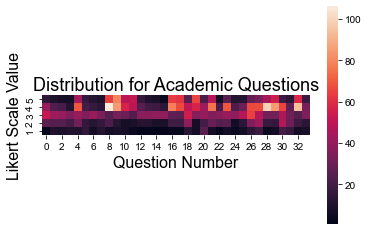

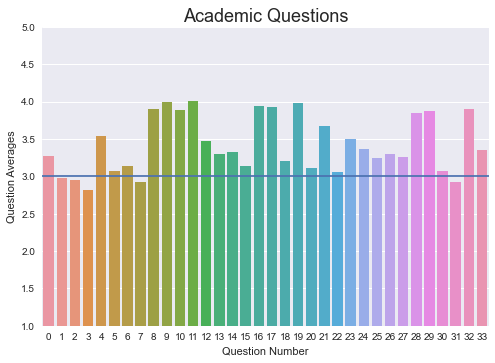

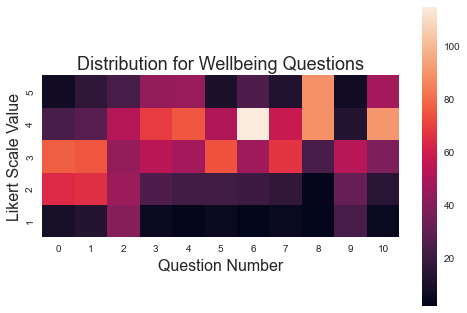

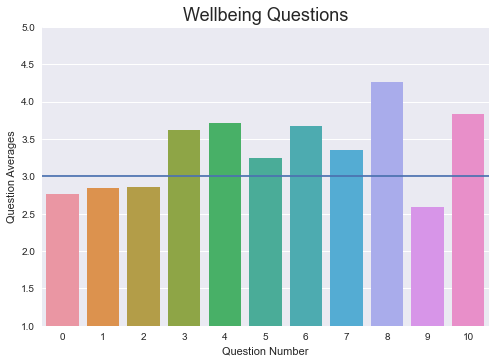

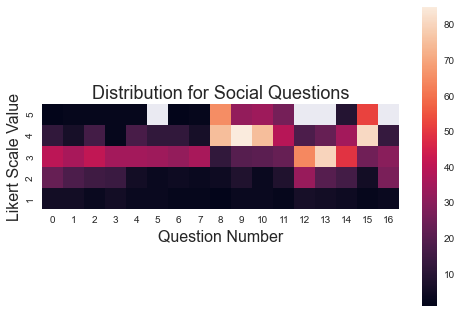

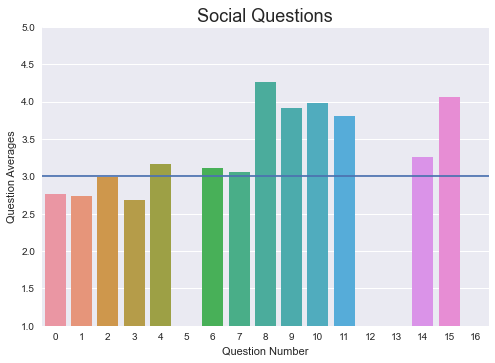

In [4]:
#These variables list the index start and end for the separate groups within the questionnaire (academic, wellbeing, and social)
#The numbers refer to the begininng of a group of questions (startin numbers) to the ending of the same set of questions (endin)
#The academic, wellbeing, and social questions all have multiple parts, so this is necessary to keep them intact.
startin = [28,64,76]
endin = [62,75,93]


#This list will be used to title the distribution graphs properly in the loop
fignames = ["Academic", "Wellbeing", "Social"]
boxdatalists = []


#This loop will be able to go through the three sections (academic, wellbeing, social) in the questionnaire at the same time
for indexes in zip(startin, endin, fignames):
    start = indexes[0]
    end = indexes[1]
    figname = indexes[2]
    
    #This crops the data to only include the relevant answers to current question groups
    questdata, questnames = simind(ET, ETnames, start, end)
    
    #This is a variable that defines a string slice.  The original piece of text included a boilerplate irrelvant text chunk before
    #the question, and this string slice just gets rid of that.
    outputStart = questnames.columns[0].find('. - ') + 4
    
    #Below I have created a loop that outputs the average student rating for questions 13_1 through 13_9 to the tenth.
    #Within the loop I also define the question using the string slice, so that the printed output matches the question content.
    for i in range(0, len(questdata.columns)):
        mean = questdata[questdata.columns[i]].mean()
        question = questnames.columns[i][outputStart:]
        print("Average Student Rating for " + question + ": " + onedec(mean))
    
    #To make coherent graphs, I need to create a new dataframe by creating two lists and appending them together.  This is here because
    #it needs to be in this loop; it needs to be run three times in order to create three new sets of axes.
    plt.figure()
    graphlist = []
    
    #Used the same loop as above but replaced mean with count in order to get the number of responses for each
    #question.  By using the same loop, I can do this analysis for all three sections at once. I have commented out the print function 
    #because the output is very long, but it is helpful to see the raw distribution values.  I sorted the index so that instead of seeing 
    #the index with the highest count first, it gives the indexes in order.
    for i in range(0, len(questdata.columns)):
        count = questdata[questdata.columns[i]].value_counts().sort_index()
        question = questnames.columns[i][outputStart:]
        
        
        #This creates the new dataframe by combining the lists, as I mentioned a few steps above.
        questlist = []
        for index in count.index:
            questlist.append(count[index])
            
        #Appending adds the list in the parentheses to the end of the inital list as a single list object    
        graphlist.append(questlist)
    
    #These variables below create dataframe from lists.  Transpose swaps the x and y of a dataframe.
    graphdata = pd.DataFrame(graphlist, columns = [1, 2, 3, 4, 5]).transpose().sort_index(ascending=False)
    boxdata = pd.DataFrame(graphlist, columns = [1, 2, 3, 4, 5])
    

    #This is plotting a heatmap graph showing the distribution of the question answers using seaborn. Graphing the distribution shows whether 
    #the results really are neutral (responses from 2-4) or whether there are two polarizing groups (1 and 5) that make the data look neutral. 
    #The x axis has the question, and the y axis has the likert scale value.  The hue shows the count for each likert scale value for that question.
    #The darker the colour, the fewer people answered that value.
    sns.heatmap(graphdata, square=True)#, x=graphdata.index, y=graphdata.columns)
    plt.style.use('seaborn')
    plt.title("Distribution for " + figname + " Questions", fontsize=18)
    plt.xlabel('Question Number', fontsize=16)
    plt.ylabel('Likert Scale Value', fontsize=16)
    
    #Below this is a set of barplots that show the data for academic, wellbeing, and social groupings in an easy-to-understand way.
    #For this I used the average of each question's answers.  The average needed to be calculated manually and then added as a column.
    plt.figure()
    responses = boxdata[1] + boxdata[2] + boxdata[3] + boxdata[4] + boxdata[5]
    question_avg = (boxdata[1] + 2*boxdata[2] + 3*boxdata[3] + 4*boxdata[4]+5*boxdata[5])/responses
    boxdata['Question Averages'] = question_avg
    #print(boxdata)
    sns.barplot(data=boxdata, x=boxdata.index, y='Question Averages')
    plt.style.use('seaborn')
    plt.title(figname + " Questions", fontsize=18)
    plt.ylim(1,5)
    plt.axhline(3)
    plt.xlabel("Question Number")

In [5]:
#This will test for the average.  If the number is ridiclously large, we will assume that there are outliers.
#The mean is divided by 60 to give the answer in minutes.
print("Average Duration: " + onedec(ET['Duration (in seconds)'].mean()/60) + " Minutes")
#The number was indeed ridiclously high, so now we can look at some other statistics and then try to come up
#with a more realistic answer.

print("Median Duration: " + onedec(ET['Duration (in seconds)'].median()/60) + " Minutes")
#The median looks normal

print(ET['Duration (in seconds)'].value_counts())
#There is a tie between three modes (10, 6, and 7 seconds), all with 10 values.  These modes are not useful as they are both not realistic numbers
#nor do they have a high number of values compared to dataset as a whole.  For this reason the mode will be excluded.

Average Duration: 18.3 Minutes
Median Duration: 8.8 Minutes
85      5
594     3
398     3
426     3
430     3
       ..
509     1
1120    1
112     1
1846    1
260     1
Name: Duration (in seconds), Length: 278, dtype: int64


In [6]:
#This code removes outliers by taking out values within the column that have a z-score above 3.
ETstat = ET['Duration (in seconds)']
print(ETstat)
from scipy import stats
ETstatRem = ETstat[((ETstat-ETstat.mean()).abs() < 3*ETstat.std())]

0       3345
1         17
2         18
3         20
4         19
       ...  
317     2038
318    12335
319      594
320      450
321      260
Name: Duration (in seconds), Length: 322, dtype: int64


In [7]:
#24 outliers were removed.  Lets see our average now!

print("Average Duration: " + onedec(ETstatRem.mean()/60) + " Minutes")


Average Duration: 12.9 Minutes


Text(0, 0.5, 'Duration in Seconds')

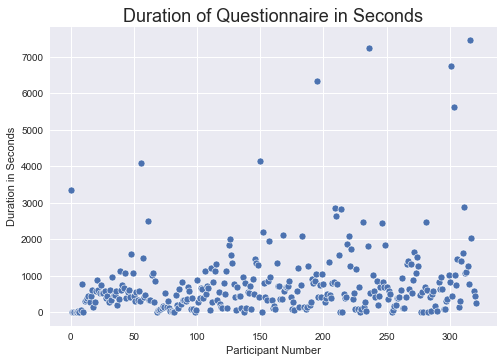

In [8]:
#This is still very high!  How unusual.  Maybe we can graph it and get a better idea of what's happening...
plt.figure()
sns.scatterplot(data=ETstatRem)
plt.style.use('seaborn')
plt.title("Duration of Questionnaire in Seconds", fontsize=18)
plt.xlabel("Participant Number")
plt.ylabel("Duration in Seconds")

In [9]:
#From this we can see that there still are a lot of "outliers" - but at what point does there become enough outliers
#that we can consider this an acceptable group?  Still, it's clear from the graph that the majority of participants
#hung around the bottom line together.  Let's try altering our data again to get just these participants.

ETstatRem2 = ETstat[((ETstat-ETstat.mean()).abs() < 0.2*ETstat.std())]
print("Average Duration: " + onedec(ETstatRem2.mean()/60) + " Minutes")

Average Duration: 15.1 Minutes


Text(0, 0.5, 'Duration in Seconds')

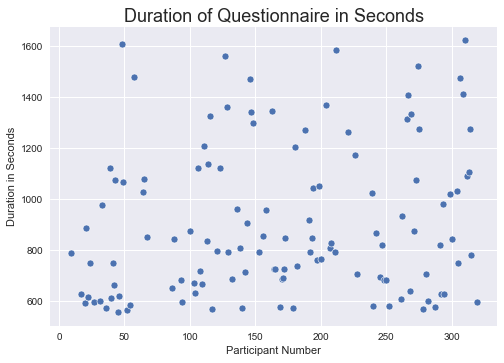

In [10]:
#Now lets graph it again
plt.figure()
sns.scatterplot(data=ETstatRem2)
plt.style.use('seaborn')
plt.title("Duration of Questionnaire in Seconds", fontsize=18)
plt.xlabel("Participant Number")
plt.ylabel("Duration in Seconds")

#We had to shrink the acceptable z-score from below 3 to below 0.2 to get a graph where the majority bottom line was even
#visible.  Still, the vasts majority of scores on the graph are below 2000 seconds (roughly 33 minutes).  For a 
#questionnaire that was only supposed to take 10-15 minutes, this makes sense.  The number of outliers is concerning,
#but it is difficult to tell on an unsupervised digital questionnaire whether participants were idling or whether they 
#really just took that long.  

#Even after "outliers" with a z-score of more than 0.2 were removed, the average was still 14.6 minutes, the upper side of
#our 10-15 minute estimate.  Future questionnaires should be closer to the middle of this (13 minutes).

In [11]:
#I used this to find the value counts for values of 0-10 seconds.  The index goes to 8 instead of 10 because some values in 0-10 had 0, which
#caused it to display 0-12 instead of 0-10.  Changing the index to 0-8 fixed this.
ETstat0_10 = ETstat.value_counts().sort_index()[0:8]
print(ETstat0_10)



5     1
6     2
9     1
10    2
12    1
14    1
15    2
16    2
Name: Duration (in seconds), dtype: int64


In [12]:
#lets find the sum of how many participants took 10 or less seconds
print("Total Number of Participants Who Took 10 or Less Seconds to 'Finish': " + onedec(ETstat0_10.sum()))

#What percentage out of the total is that?  The total n value is 1143. The sum of the participants who took 10 or less seconds was divided by 1143
#and then multiplied by 100 to get the percent.
print("Percentage of Participants Who Took 10 or Less Seconds to 'Finish': " + onedec((ETstat0_10.sum()/1143)*100) + "%")

Total Number of Participants Who Took 10 or Less Seconds to 'Finish': 12.0
Percentage of Participants Who Took 10 or Less Seconds to 'Finish': 1.0%


In [13]:
#Next, let's quickly look at the completion rates for the questionnaire.  This is also tricky to analyse, as participants were
#allowed to fill out as much of the questionnaire as they felt comfortable with, excluding questions they did not want to answer.
#In this way, "completeness" becomes a strange measurement as incomplete results are not removed from the data.
#Regardless, let's look at the data.

#"0" indictates that the participant left the questionnaire before the end point and "1" indicates that they fully completed the
#questionnaire.  In this case, there was a prize draw at the end of the survey.
ETfin = ET['Finished'].value_counts()
print(ETfin)


0    228
1     94
Name: Finished, dtype: int64


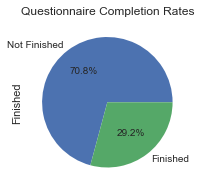

In [14]:
#Wow - a lot more people left the questionnaire unfinished.  Let's see a pie chart!
pie = ETfin.plot.pie(figsize=(3, 3), autopct="%1.1f%%", labels=["Not Finished", "Finished"])
plt.title("Questionnaire Completion Rates")
plt.show()

In [15]:
#I used this code to find the percentage 
print("Percentage of Unfinished Participants: " + onedec(ETfin[0]/(ETfin[0] + ETfin[1])*100) + "%")
print("Percentage of Finished Participants: " + onedec(ETfin[1]/(ETfin[0] + ETfin[1])*100) + "%")

#This could be another indication that the questionnaire was too long...

Percentage of Unfinished Participants: 70.8%
Percentage of Finished Participants: 29.2%


In [16]:
#Next we will analyze some of the sliding scale questions.  There were three total: one for each section (academic, wellbeing, social).
#They asked the participant to rate how much their (academics/wellbeing/sociality) differed between semester 1 (2020-21) and semester 2 (2020-21).
#0 is drastically better in semester 1, and 19 is drastically better in semester 2.

#The two semesters are being compared because semester 1 was hybrid with some in person elements, while semester 2 was the first ever fully online
#semester.

#creating a dataframe with just these questions
scales = ET.iloc[:, [63]]
print(scales)

     Q21_1
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
..     ...
317    6.0
318    5.0
319    6.0
320    6.0
321    7.0

[322 rows x 1 columns]


In [17]:
print(scales['Q21_1'].value_counts())

6.0    48
4.0    41
5.0    27
2.0    25
7.0    17
0.0    16
3.0    15
1.0    13
8.0    13
Name: Q21_1, dtype: int64


In [18]:
scalesAca = (scales['Q21_1']/8)*100

In [19]:
print(scalesAca)

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
       ... 
317    75.0
318    62.5
319    75.0
320    75.0
321    87.5
Name: Q21_1, Length: 322, dtype: float64


In [20]:
#This question asked participants what their ideal semester would include.  Questions 1-5 correspond as follows:
# 1) Lectures 2) Tutorials 3) Seminars 4) Practicals - Computer labs 5) Practicals - Wet labs
#The choices for these questions are ranked from 1-4: 1) in person 2) online 3) hybrid 4) blended
#This is not a linear ranking - it is categorical!

#this creates a dataframe with just the five columns related to this question
idealdata = ET.iloc[:, 94:99]

#Since the data is categorical, the mean will not be useful.  Instead, lets check out the mode.
idealdata.mode()

,Q58_1,Q58_2,Q58_3,Q58_4,Q58_5
0,1.0,1.0,1.0,1.0,1.0


In [21]:
#This data is best shown in a barplot with count (number of votes) on the x axis, and choices for the questions on the y axis.
#print(idealdata)

#creating a new dataframe using sorted value counts.  The first loop goes question by question.  It creates sublists, making four versions
#of each questions (one for each response type).
newdata = []
for question in idealdata.columns:
    sublists = []
    
    #The second loop goes response by response.  We create a new row in our dataframe containing the count for each question/response combo.
    value_counts = idealdata[question].value_counts().sort_index()
    for ind in value_counts.index:
        #This dictionary allows us to convet between numerical and textual names for the responses
        textresponses = {
            1: "In-Person",
            2: "Online",
            3: "Hybrid",
            4: "Blended"
        }
        #This dictionary converts the question codes to the question text the respondents saw
        questionnames = {
            "Q58_1": "Lectures",
            "Q58_2": "Tutorials",
            "Q58_3": "Seminars",
            "Q58_4": "Computer Labs",
            "Q58_5": "Wet Labs"
        }
        sublist = [questionnames[question], textresponses[ind], value_counts[ind]]
        #print(sublist)
        #This saves our list to the list of lists for each question
        sublists.append(sublist)
    #This saves all of our rows to the new dataframe
    newdata.extend(sublists)


Text(0.5, 1.0, 'Ideal Learning Type Responses')

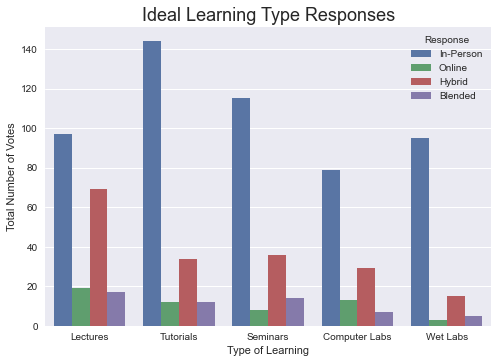

In [22]:
#This preps our new dataframe with just the columns we need to graph
bardata = pd.DataFrame(newdata, columns=['Question', 'Response', 'Count'])
#print(bardata)

#This graphs our barplot with the questions on the x axis, the total count on the y axis, and the response type as the color bars
plt.figure()
sns.barplot(data=bardata, x='Question', hue='Response', y='Count')
plt.style.use("seaborn-colorblind")
plt.xlabel("Type of Learning")
plt.ylabel("Total Number of Votes")
plt.title("Ideal Learning Type Responses", fontsize=18)


In [23]:
#Some of the Core GP questions need to be reverse coded, as some relate to positive aspects and others relate to negative aspects.
#The likert scale measures frequency.
#Here is a list of the questions:
#Positive questions: 1,3,4,6,8,9,14,15
#Negative questions: 2,5,7,10,11,13
#There are less negative questions, so these will be reverse coded.
#Question 12 should be removed - although, since this is the test question, all core GP results that failed to answer this correctly 
#should be dropped.
#Question 12 asks participants to select 2 if they are attentive

#Using the iloc function to get just the columns with the Core GP questions
coreGP = ET.iloc[:,13:27]
print(coreGP)


     CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
0          NaN        NaN        NaN        NaN        NaN        NaN   
1          NaN        NaN        NaN        NaN        NaN        NaN   
2          NaN        NaN        NaN        NaN        NaN        NaN   
3          NaN        NaN        NaN        NaN        NaN        NaN   
4          NaN        NaN        NaN        NaN        NaN        NaN   
..         ...        ...        ...        ...        ...        ...   
317        5.0        5.0        2.0        3.0        5.0        3.0   
318        5.0        3.0        4.0        4.0        1.0        5.0   
319        3.0        3.0        4.0        4.0        5.0        3.0   
320        5.0        2.0        5.0        5.0        3.0        5.0   
321        3.0        4.0        3.0        4.0        4.0        4.0   

     CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
0          NaN        NaN        NaN         Na

In [24]:
goodpart = coreGP['CORE-GP_VC'] == 2
coreGPnew = coreGP.copy()[goodpart]
print(coreGPnew)

     CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
11         4.0        4.0        2.0        4.0        3.0        4.0   
12         1.0        2.0        4.0        4.0        2.0        4.0   
14         2.0        4.0        3.0        3.0        4.0        2.0   
15         3.0        2.0        4.0        4.0        3.0        3.0   
16         1.0        1.0        3.0        2.0        3.0        2.0   
..         ...        ...        ...        ...        ...        ...   
317        5.0        5.0        2.0        3.0        5.0        3.0   
318        5.0        3.0        4.0        4.0        1.0        5.0   
319        3.0        3.0        4.0        4.0        5.0        3.0   
320        5.0        2.0        5.0        5.0        3.0        5.0   
321        3.0        4.0        3.0        4.0        4.0        4.0   

     CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
11         5.0        3.0        4.0         4.

Text(0.5, 0, 'Number of Selections')

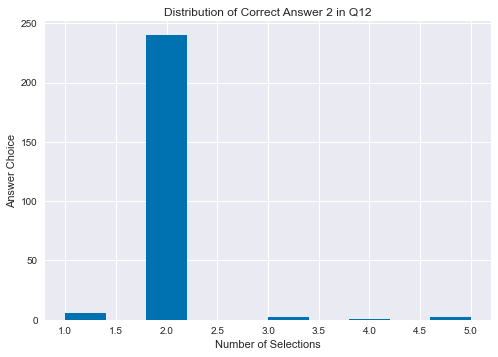

In [25]:
plt.figure()
plt.hist(coreGP['CORE-GP_VC'])
plt.title('Distribution of Correct Answer 2 in Q12')
plt.ylabel('Answer Choice')
plt.xlabel('Number of Selections')

In [26]:
negquestions = ["CORE-GP_2", "CORE-GP_5", "CORE-GP_7", "CORE-GP_10", "CORE-GP_11", "CORE-GP_12"]
coreGPneg = coreGPnew.loc[goodpart, negquestions]
#Looks right

#Making a dictionary with the reverse coding
coreGPnegdic = {
    1:5,
    2:4,
    3:3,
    4:2,
    5:1
}
#This applies the dictionary to the data   
coreGPneg = coreGPneg.applymap(coreGPnegdic.get)
#This updates the dataframe with the reverse coding values; since the data was SO similar, we could use update instead of merge
coreGPreversed = coreGPnew.copy()
coreGPreversed.update(coreGPneg)
coreGPnew = coreGPreversed



#That worked, the reverse coding has been done on these questions.  Now I need to merge them together while keeping the values from coreGPneg

In [27]:
coreGPclindic = {
    5:4,
    4:3,
    3:2,
    2:1,
    1:0
}
coreGPnew = coreGPnew.applymap(coreGPclindic.get)
coreGPnew2 = coreGPnew
print(coreGPnew2)

     CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
11           3          1        1.0        3.0          2        3.0   
12           0          3        3.0        3.0          3        3.0   
14           1          1        2.0        2.0          1        1.0   
15           2          3        3.0        3.0          2        2.0   
16           0          4        2.0        1.0          2        1.0   
..         ...        ...        ...        ...        ...        ...   
317          4          0        1.0        2.0          0        2.0   
318          4          2        3.0        3.0          4        4.0   
319          2          2        3.0        3.0          0        2.0   
320          4          3        4.0        4.0          2        4.0   
321          2          1        2.0        3.0          1        3.0   

     CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
11           0        2.0        3.0           

In [28]:
coreGPclindic2 = {
    0:4,
    1:3,
    2:2,
    4:0,
    3:1
}
coreGPnew2 = coreGPnew2.applymap(coreGPclindic2.get)
coreGPnew3 = coreGPnew2
print(coreGPnew3)

     CORE-GP_1  CORE-GP_2  CORE-GP_3  CORE-GP_4  CORE-GP_5  CORE-GP_6  \
11           1          3        3.0        1.0          2        1.0   
12           4          1        1.0        1.0          1        1.0   
14           3          3        2.0        2.0          3        3.0   
15           2          1        1.0        1.0          2        2.0   
16           4          0        2.0        3.0          2        3.0   
..         ...        ...        ...        ...        ...        ...   
317          0          4        3.0        2.0          4        2.0   
318          0          2        1.0        1.0          0        0.0   
319          2          2        1.0        1.0          4        2.0   
320          0          1        0.0        0.0          2        0.0   
321          2          3        2.0        1.0          3        1.0   

     CORE-GP_7  CORE-GP_8  CORE-GP_9  CORE-GP_10  CORE-GP_11  CORE-GP_VC  \
11           4        2.0        1.0           

In [29]:
#Lets drop the VC question entirely before we graph, since it doesn't show any real data
coreGPdropped = coreGPnew3.drop('CORE-GP_VC', axis=1)
coreGPdropped
#Great, now our data is almost ready to be graphed

,CORE-GP_1,CORE-GP_2,CORE-GP_3,CORE-GP_4,CORE-GP_5,CORE-GP_6,CORE-GP_7,CORE-GP_8,CORE-GP_9,CORE-GP_10,CORE-GP_11,CORE-GP_12,CORE-GP_13
11,1,3,3.0,1.0,2,1.0,4,2.0,1.0,3,2.0,3,3
12,4,1,1.0,1.0,1,1.0,1,2.0,0.0,0,0.0,1,1
14,3,3,2.0,2.0,3,3.0,2,1.0,2.0,2,1.0,2,3
15,2,1,1.0,1.0,2,2.0,2,3.0,1.0,2,2.0,1,1
16,4,0,2.0,3.0,2,3.0,3,3.0,2.0,2,2.0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,0,4,3.0,2.0,4,2.0,1,4.0,3.0,0,3.0,1,4
318,0,2,1.0,1.0,0,0.0,0,1.0,0.0,0,0.0,1,1
319,2,2,1.0,1.0,4,2.0,4,3.0,0.0,0,2.0,3,0
320,0,1,0.0,0.0,2,0.0,2,0.0,0.0,0,0.0,1,0


In [30]:
coreGPnew3 = pd.DataFrame(coreGPnew3)
coreGPnew3.isna().sum()

CORE-GP_1     0
CORE-GP_2     0
CORE-GP_3     1
CORE-GP_4     2
CORE-GP_5     0
CORE-GP_6     1
CORE-GP_7     0
CORE-GP_8     1
CORE-GP_9     2
CORE-GP_10    0
CORE-GP_11    1
CORE-GP_VC    0
CORE-GP_12    0
CORE-GP_13    0
dtype: int64

In [31]:
coreind = coreGPnew3.dropna()
coreind = (coreind.sum(axis=1))/14
coreind


11     2.285714
12     1.214286
14     2.285714
15     1.714286
16     2.285714
         ...   
317    2.428571
318    0.714286
319    1.928571
320    0.642857
321    2.285714
Length: 232, dtype: float64

In [32]:
coreind = pd.DataFrame(coreind)
coreind = coreind.rename(columns = {0:'Avg'})
print(coreind)

          Avg
11   2.285714
12   1.214286
14   2.285714
15   1.714286
16   2.285714
..        ...
317  2.428571
318  0.714286
319  1.928571
320  0.642857
321  2.285714

[232 rows x 1 columns]


In [33]:
coreindresults = (coreind[coreind.Avg < 1]).count()
print(coreindresults)
#total is 55 out of 821
coreindresults2 = (coreind[coreind.Avg < 2]).count()
print(coreindresults2)
coreindresults3 = (coreind[coreind.Avg < 3]).count()
print(coreindresults3)
coreindresults4 = (coreind[coreind.Avg < 4]).count()
print(coreindresults4)
coreindresults5 = (coreind[coreind.Avg < 5]).count()
print(coreindresults5)

Avg    44
dtype: int64
Avg    152
dtype: int64
Avg    224
dtype: int64
Avg    232
dtype: int64
Avg    232
dtype: int64


In [34]:
#If we want to plot the average scores, we need to get the averages and add it as a column 
coreGPnewmean = coreGPdropped.mean()
coreGPnewmean

CORE-GP_1     1.612500
CORE-GP_2     2.362500
CORE-GP_3     1.481172
CORE-GP_4     1.466387
CORE-GP_5     1.629167
CORE-GP_6     1.384937
CORE-GP_7     1.754167
CORE-GP_8     1.305439
CORE-GP_9     1.130252
CORE-GP_10    1.316667
CORE-GP_11    1.711297
CORE-GP_12    1.345833
CORE-GP_13    1.733333
dtype: float64

In [35]:
def getquestnumber(str):
    return str[str.find('_')+1:]

In [36]:
def offsetvalues(value):
    value = int(value)
    if value > 11:
        value += 1
    return str(value)

In [37]:
#This maps the graph indexes and offsetvalues to the dataframe to apply them
coreGPnewgraph = coreGPnewmean.copy()
coreGPnewinter = coreGPnewgraph.index.map(getquestnumber)
coreGPnewgraph.index = coreGPnewinter.map(offsetvalues)

(1.0, 5.0)

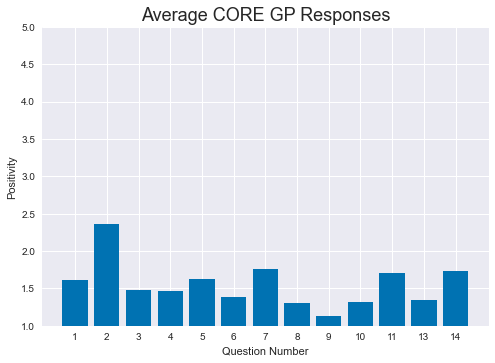

In [38]:
#Graphing a barplot of the average CORE GP responses per question number
plt.figure()
plt.bar(x=coreGPnewgraph.index, height=coreGPnewgraph)
plt.style.use("seaborn-deep")
plt.xlabel("Question Number")
plt.ylabel("Positivity")
plt.title("Average CORE GP Responses", fontsize=18)
plt.ylim(1,5)

#It's important to remember that since the negative questions were reversed coded, this graph is showing the frequency of positivity rates 
#among students during the relevant semester.  3 in this case is again neutral - the results show that almost all the scores are close to 3.

In [39]:
ETdemo = ET.iloc[:,3:12]

ETdemo = ETdemo.drop(columns=['Question 4'])

ETdemo

,Question 1,Question 2,Q8,Q11,Q11.1,Q61_1,Q61_2,Q61_3
0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
317,"20,4,13,16,7,9,11,12",2.0,"4,5,7",4,4.0,NaN,1.0,NaN
318,"20,7",2.0,1,8,6.0,NaN,NaN,NaN
319,20,2.0,"1,5,8",24,4.0,NaN,NaN,NaN
320,17,2.0,"1,10","1,9",6.0,1.0,1.0,NaN


In [40]:
def getdemotext(numbers):
    #print(numbers)
    numlist = numbers.split(",")
    strlist = []
    for num in numlist:
        strlist.append(ETdemoQ1dic.get(int(num)))
    return ",".join(strlist)

In [41]:
#Dropping the participants who did not answer demographic groups so the NaN doesn't interfere with graphing.  Also, "15" was not tied to any
#demographic but somehow appeared in the data once (no idea how this happened) and this code dropped the nonsense row.
ETdemo1 = ETdemo[~ETdemo['Question 1'].str.contains("15", na=False)]

ETdemo1 = ETdemo1.rename(columns={"Question 1": "Question_1"})

ETdemo1 = ETdemo1[ETdemo1.Question_1 != '19']

ETdemo1 = ETdemo1.rename(columns={"Question_1": "Question 1"})

ETdemoQ1 = ETdemo1['Question 1'].dropna()

#Note - the ETnames dataframe doesn't contain any useful captions for this question, so I will need to list the demographic categories manually
#Making a dictionary with the demographic titles.  Qualtrics messed up the numbering, which is why all the numbers are seemingly random.
#I manually matched the titles to the response ID and made sure I found the corresponding number for each identity, so these are correct.
ETdemoQ1dic = {
    20:"Undergraduate", 
    1:"Postgraduate Taught", 
    3:"Working Students", 
    4:"Mature Students", 
    13:"Commuting Students", 
    16:"Care Experienced",
    5:"BAME Students", 
    6:"LGBTQIA Students", 
    7:"International Students", 
    8:"Remote Learning Students", 
    18:"Foundation Course Students",
    17:"Evening Degree Students",
    9:"Students with Learning Disabilities",
    10:"Students with Physical Disabilities",
    14:"Neurodivergent Students", 
    11:"Students with Mental Health Disabilities", 
    12:"Students with Other Disabilities", 
    19:"GOYO Students"
}

#This maps the dictionary to the values within the dataframe
ETdemoQ1 = ETdemoQ1.map(getdemotext)
ETdemoQ1

8                                          Undergraduate
11                                         Undergraduate
12                                         Undergraduate
13                  Undergraduate,International Students
14                                         Undergraduate
                             ...                        
317    Undergraduate,Mature Students,Commuting Studen...
318                 Undergraduate,International Students
319                                        Undergraduate
320                              Evening Degree Students
321                                        Undergraduate
Name: Question 1, Length: 287, dtype: object

In [42]:
#Now lets take a look at how many participants in each demographic group we have...

#This loop counts the number of demographic categories in each row to determine the value counts category by category.  The count is taken
#so that we can get the total number of each category.  The loop allows us to get this number for each category without cancelling out the
#overlapping values.
ETbardemo = []
for category in ETdemoQ1dic.values():
    ETfiltered = ETdemoQ1[ETdemoQ1.str.contains(category)]
    ETbardemo.append(ETfiltered.count())

In [43]:
#This turns the list into a series so that we can use the values from the dictionary above as the indices    
ETseries = pd.Series(data = ETbardemo, index=list(ETdemoQ1dic.values()))

In [44]:
#This turns the series back into a dataframe to make it easier to graph
ETdemdatF = ETseries.to_frame()

In [45]:
#Renaming a column from 0 so that it stops messing up my code later on
ETdemdatF = ETdemdatF.rename(columns={0:"DemoCounts"})
print(ETdemdatF)

                                          DemoCounts
Undergraduate                                    263
Postgraduate Taught                               23
Working Students                                  47
Mature Students                                   18
Commuting Students                                38
Care Experienced                                   6
BAME Students                                     26
LGBTQIA Students                                  87
International Students                            97
Remote Learning Students                           3
Foundation Course Students                         4
Evening Degree Students                            2
Students with Learning Disabilities               16
Students with Physical Disabilities               11
Neurodivergent Students                           44
Students with Mental Health Disabilities          52
Students with Other Disabilities                  11
GOYO Students                                 

In [46]:
#Lets do the same for school counts
##ETdemoQ10 = ETdemoQ10.dropna()
#print(ETdemoQ10)
##ETschool = []
##for category in ETdemoQ10dic.values():
    #ETfiltered = ETdemoQ10[ETdemoQ10.str.contains(category)]
    #ETschool.append(ETfiltered.count())
##ETseries = pd.Series(data = ETschool, index=list(ETdemoQ10dic.values()))
##ETschdat = ETseries.to_frame()
##ETschdat = ETschdat.rename(columns={0:"School Counts"})
#print(ETschdat)

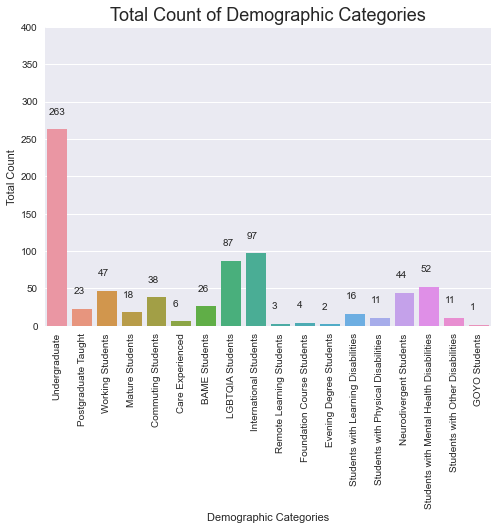

In [47]:
#Plotting a barplot that shows the total counts of each demographic category.  Some of these are overlapping (the same people can count multiple
#times for different demographics) so it is not a representation of how many individuals the data shows independently.
plt.figure()
sns.barplot(data=ETdemdatF, x=ETdemdatF.index, y="DemoCounts")
plt.xlabel("Demographic Categories")
plt.ylabel("Total Count")
plt.ylim(0,400)
plt.title("Total Count of Demographic Categories", fontsize=18)
plt.xticks(rotation=90)

#This loop is for getting the text values to appear on the top of the bars
for index, value in enumerate(ETdemdatF["DemoCounts"]):
    plt.text(y=value+20, x=index-.35, s=str(value))

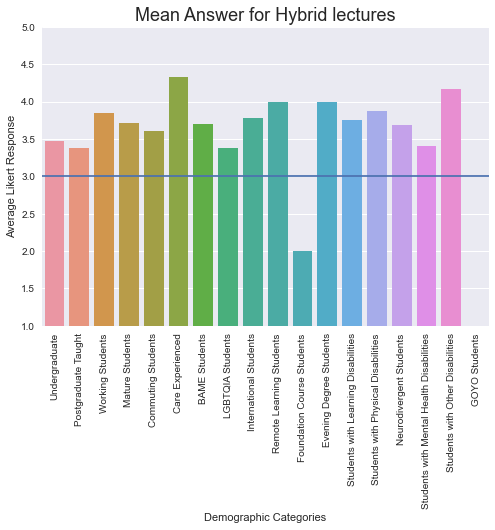

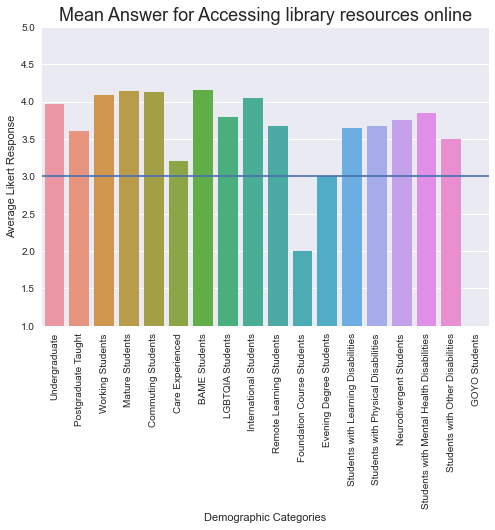

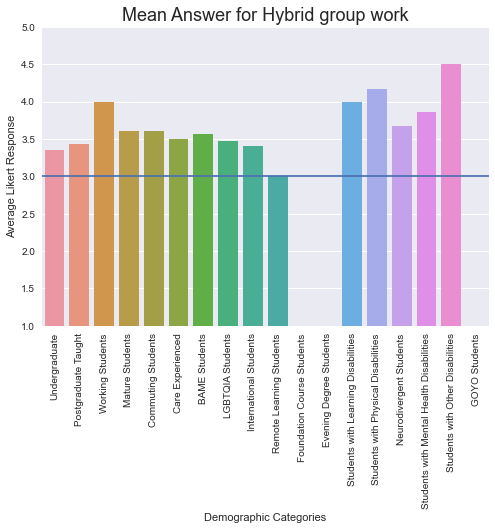

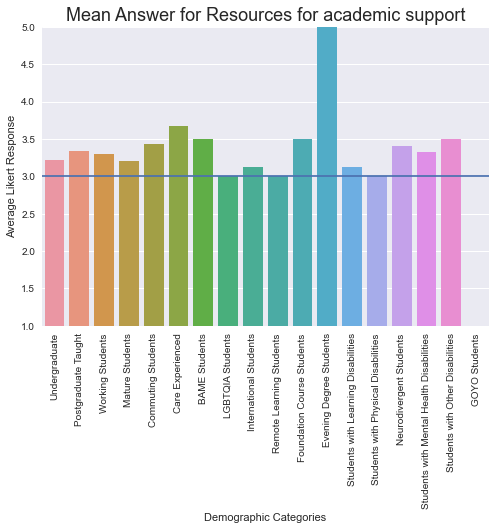

In [48]:
#Now I will try to replace ETdemoQ1 into ETdemo so that the named question library appears in the main demographic dataframe
ETdemonew = ET.copy()
ETdemonew['Question 1'] = ETdemoQ1
#Lets see if we can look at some of the later questions through the scope of question 1 demographics

#Dropping the null values again

ETdemonew = ETdemonew.rename(columns={"Question 1": "Question_1"})

ETdemonew = ETdemonew[ETdemonew.Question_1 != 'GOYO Students']

ETdemonew = ETdemonew.rename(columns={"Question_1": "Question 1"})

ETdemonew = ETdemonew[ETdemonew['Question 1'].notnull()]

#Making the new indexes for a dataframe we will make later - we want the indexes of our dataframe to be all the possible combinations 
#of the demographic categories and Likert Scale answers, therefore we use a multi-index dataframe
ETmultiindex = pd.MultiIndex.from_product([ETdemoQ1dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])


#We will need to go through one subquestion at a time due to the sheer amount of data we are looking at
ETfiltered = ETdemonew[['Question 1', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19', 'Q13_20', 'Q13_21', 'Q13_22', 'Q13_23', 'Q13_24',
                        'Q13_25', 'Q13_26', 'Q13_27', 'Q13_28', 'Q13_29', 'Q13_30', 'Q13_31', 'Q13_32', 'Q13_33', 'Q13_34', 'Q13_35']]

#This dictionary stores our values for the final dataframe
valuecountsdict = {}

#creates a list containing the names of the demographic categories
categories = ETdemoQ1dic.values()

#This loops through all of the questions in the filtered dataframe
for column in ETfiltered.columns:
    #This column contains the demographic answers, so we don't want to get the mean of this.  The continue statement moves on to the next iteration
    #of the loop if it reaches question 1
    if column == 'Question 1':
        continue
    
    means = []
    # We loop through all the demographics in the questionnaire, setting 'category' to be the demographic we are currently looking at 
    # in each iteration of the loop
    for category in  ETdemoQ1dic.values():
        #This filters by all answers that contain the demographic category name (i.e. all people who selected this demographic)
        ETdoublefiltered = ETfiltered[ETfiltered['Question 1'].str.contains(category)]
        #Numeric_only stops trying to take means of strings, which was previously causing errors
        ETtriplefiltered = ETdoublefiltered[column]
        #This adds the item (the mean) to the end of the list
        means.append(ETtriplefiltered.mean())
    #Turning the list back into a dataframe
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    
    
    #We don't want a million outputs - let's try to use the z-score to get only the outputs that are interesting.
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    #print(column, ETtripleplotZ)
    #This will filter out all the columns that do not have a z score above 2.5.  In this way, the only values in this series are ones
    #that have "significant" results according to z-score, i.e. columns that have averages that are higher/lower than average to a 
    #noticable degree.
    
    
    #Writing a dictionary to get the question names.  It was faster than trying to loop with ETnames like before.
    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Live online tutorials", 
        "Q13_3":"Live online seminars", 
        "Q13_4":"Live online labs/practicals", 
        "Q13_5":"Recorded lectures", 
        "Q13_6":"Recorded tutorials",
        "Q13_7":"Recorded seminars", 
        "Q13_8":"Recorded labs/practicals", 
        "Q13_9":"Fully in-person lectures", 
        "Q13_10":"Fully in-person tutorials", 
        "Q13_11":"Fully in-person seminars",
        "Q13_12":"Fully in-person labs/practicals",
        "Q13_13":"Hybrid lectures",
        "Q13_14":"Hybrid tutorials",
        "Q13_15":"Hybrid seminars",
        "Q13_16":"Hybrid labs/practicals", 
        "Q13_17":"Accessing library resources online",
        "Q13_18":"Accessing library resources in-person",
        "Q13_19":"Schedule flexibility",
        "Q13_20":"Online exams",
        "Q13_21":"In-person exams",
        "Q13_22":"Function of devices/wifi/platforms",
        "Q13_23":"Online group work",
        "Q13_24":"Fully in-person group work",
        "Q13_25":"Hybrid group work",
        "Q13_26":"Resources for academic support",
        "Q13_27":"Feelings of identity/belonging within school",
        "Q13_28":"Feelings of identity/belonging within university",
        "Q13_29":"Online learning materials",
        "Q13_30":"Online reading lists",
        "Q13_31":"Consistency between modules",
        "Q13_32":"Ability to study fully online",
        "Q13_33":"Ability to study in-person",
        "Q13_34":"Ability to study hybrid style",
        "Q13_35":"Feelings of safety in in-person settings",
    }
    
    #this plots the graphs as long as ETtripleplotZ is not empty
    #ETtripleplotZ is only empty if there are no significant values
    if not ETtripleplotZ.empty:
        
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Demographic Categories")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        #The axhline displays at 3, the neutral category. This highlights the distance from neutral better.
        plt.axhline(3)

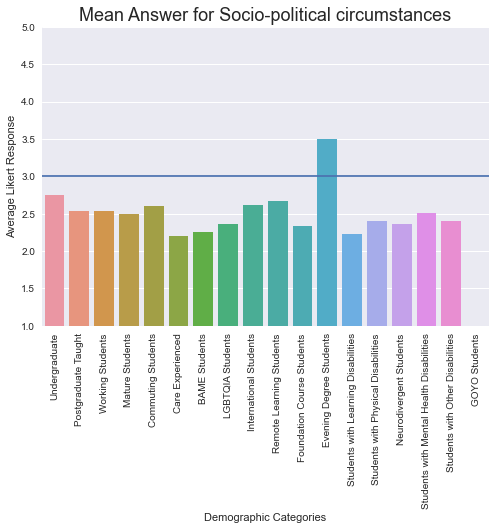

In [49]:
#Lets do this again for wellbeing by copying the code and just changing what we need
#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!

ETdemonew = ET.copy()
ETdemonew['Question 1'] = ETdemoQ1


ETdemonew = ETdemonew.rename(columns={"Question 1": "Question_1"})

ETdemonew = ETdemonew[ETdemonew.Question_1 != 'GOYO Students']

ETdemonew = ETdemonew.rename(columns={"Question_1": "Question 1"})
ETdemonew = ETdemonew[ETdemonew['Question 1'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ1dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 1', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12']]

valuecountsdict = {}

categories = ETdemoQ1dic.values()
for column in ETfiltered.columns:
    if column == 'Question 1':
        continue
    
    means = []
    for category in  ETdemoQ1dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 1'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})

    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends",
        "Q18_10":"Periods of social isolation",
        "Q18_11":"Feelings of safety in general",
        "Q18_12":"Feelings of safety from COVID-19"
        
    }
    
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Demographic Categories")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)

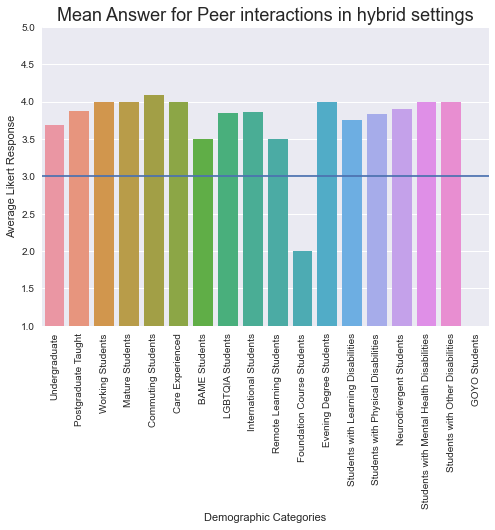

In [50]:
#Repeating the code for the last set of questions - the social category
#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!

ETdemonew = ET.copy()
ETdemonew['Question 1'] = ETdemoQ1


ETdemonew = ETdemonew.rename(columns={"Question 1": "Question_1"})

ETdemonew = ETdemonew[ETdemonew.Question_1 != 'GOYO Students']

ETdemonew = ETdemonew.rename(columns={"Question_1": "Question 1"})
ETdemonew = ETdemonew[ETdemonew['Question 1'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ1dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 1', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8', 'Q33_9', 'Q33_10', 'Q33_11', 'Q33_12', 'Q33_13',
                       'Q33_14', 'Q33_15', 'Q33_16', 'Q33_17', 'Q33_18']]

valuecountsdict = {}

categories = ETdemoQ1dic.values()
for column in ETfiltered.columns:
    if column == 'Question 1':
        continue
    
    means = []
    for category in  ETdemoQ1dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 1'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
   
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Hybrid society events", 
        "Q33_6":"Hybrid union events",
        "Q33_7":"Hybrid school-run events", 
        "Q33_8":"Hybrid residence-run events",
        "Q33_9":"In-person society events",
        "Q33_10":"In-person union-run events",
        "Q33_11":"In-person school-run events",
        "Q33_12":"In-person residence-run events",
        "Q33_13":"Online groups/chats",
        "Q33_14":"Online society groups",
        "Q33_15":"Peer interactions online",
        "Q33_16":"Peer interactions in-person",
        "Q33_17":"Peer interactions in hybrid settings",
        "Q33_18":"Online attendance during isolation",
    }
  
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Demographic Categories")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)


In [52]:
ETdemonew = ET.copy()
ETdemoQ2 = ETdemonew['Question 2'] 

ETdemoQ2dic = {
    1:"Male", 
    2:"Female", 
    3:"Other", 
    4:"Non-binary/third gender", 
    5:"Prefer not to say"
    
}

ETdemoQ2 = ETdemoQ2.map(ETdemoQ2dic.get)


ETdemonew = ET.copy()
ETdemonew['Question 2'] = ETdemoQ2

ETdemonew = ETdemonew[ETdemonew['Question 2'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ2dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 2', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19', 'Q13_20', 'Q13_21', 'Q13_22', 'Q13_23', 'Q13_24',
                        'Q13_25', 'Q13_26', 'Q13_27', 'Q13_28', 'Q13_29', 'Q13_30', 'Q13_31', 'Q13_32', 'Q13_33', 'Q13_34', 'Q13_35']]

valuecountsdict = {}

categories = ETdemoQ2dic.values()
for column in ETfiltered.columns:
    if column == 'Question 2':
        continue
    
    means = []
    for category in  ETdemoQ2dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 2'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
   
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]

    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Live online tutorials", 
        "Q13_3":"Live online seminars", 
        "Q13_4":"Live online labs/practicals", 
        "Q13_5":"Recorded lectures", 
        "Q13_6":"Recorded tutorials",
        "Q13_7":"Recorded seminars", 
        "Q13_8":"Recorded labs/practicals", 
        "Q13_9":"Fully in-person lectures", 
        "Q13_10":"Fully in-person tutorials", 
        "Q13_11":"Fully in-person seminars",
        "Q13_12":"Fully in-person labs/practicals",
        "Q13_13":"Hybrid lectures",
        "Q13_14":"Hybrid tutorials",
        "Q13_15":"Hybrid seminars",
        "Q13_16":"Hybrid labs/practicals", 
        "Q13_17":"Accessing library resources online",
        "Q13_18":"Accessing library resources in-person",
        "Q13_19":"Schedule flexibility",
        "Q13_20":"Online exams",
        "Q13_21":"In-person exams",
        "Q13_22":"Function of devices/wifi/platforms",
        "Q13_23":"Online group work",
        "Q13_24":"Fully in-person group work",
        "Q13_25":"Hybrid group work",
        "Q13_26":"Resources for academic support",
        "Q13_27":"Feelings of identity/belonging within school",
        "Q13_28":"Feelings of identity/belonging within university",
        "Q13_29":"Online learning materials",
        "Q13_30":"Online reading lists",
        "Q13_31":"Consistency between modules",
        "Q13_32":"Ability to study fully online",
        "Q13_33":"Ability to study in-person",
        "Q13_34":"Ability to study hybrid style",
        "Q13_35":"Feelings of safety in in-person settings",
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Gender")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [53]:
ETdemonew = ET.copy()
ETdemoQ2 = ETdemonew['Question 2'] 

ETdemoQ2dic = {
    1:"Male", 
    2:"Female", 
    3:"Other", 
    4:"Non-binary/third gender", 
    5:"Prefer not to say"
    
}

ETdemoQ2 = ETdemoQ2.map(ETdemoQ2dic.get)

ETdemonew = ET.copy()
ETdemonew['Question 2'] = ETdemoQ2

ETdemonew = ETdemonew[ETdemonew['Question 2'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ2dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 2', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12']]


valuecountsdict = {}

categories = ETdemoQ2dic.values()
for column in ETfiltered.columns:
    if column == 'Question 2':
        continue
    
    means = []
    for category in  ETdemoQ2dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 2'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends",
        "Q18_10":"Periods of social isolation",
        "Q18_11":"Feelings of safety in general",
        "Q18_12":"Feelings of safety from COVID-19"
        
        }
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Gender")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [56]:
ETdemonew = ET.copy()
ETdemoQ2 = ETdemonew['Question 2'] 

ETdemoQ2dic = {
    1:"Male", 
    2:"Female", 
    3:"Other", 
    4:"Non-binary/third gender", 
    5:"Prefer not to say"
    
}

ETdemoQ2 = ETdemoQ2.map(ETdemoQ2dic.get)

ETdemonew = ET.copy()
ETdemonew['Question 2'] = ETdemoQ2

ETdemonew = ETdemonew[ETdemonew['Question 2'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ2dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Question 2', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8', 'Q33_9', 'Q33_10', 'Q33_11', 'Q33_12', 'Q33_13',
                       'Q33_14', 'Q33_15', 'Q33_16', 'Q33_17', 'Q33_18']]

valuecountsdict = {}

categories = ETdemoQ2dic.values()
for column in ETfiltered.columns:
    if column == 'Question 2':
        continue
    
    means = []
    for category in  ETdemoQ2dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Question 2'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Hybrid society events", 
        "Q33_6":"Hybrid union events",
        "Q33_7":"Hybrid school-run events", 
        "Q33_8":"Hybrid residence-run events",
        "Q33_9":"In-person society events",
        "Q33_10":"In-person union-run events",
        "Q33_11":"In-person school-run events",
        "Q33_12":"In-person residence-run events",
        "Q33_13":"Online groups/chats",
        "Q33_14":"Online society groups",
        "Q33_15":"Peer interactions online",
        "Q33_16":"Peer interactions in-person",
        "Q33_17":"Peer interactions in hybrid settings",
        "Q33_18":"Online attendance during isolation",
    }
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Gender")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [57]:
#Next we are looking at accommodation type:

#First lets look at accommodation / academic

# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ8dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ8dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ8dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ8 = ETdemonew['Q8'] 

ETdemoQ8dic = {
    1:"in St Andrews", 
    10:"with family", 
    2:"at home, UK", 
    4:"at home, International", 
    5:"Private accommodation",
    6:"in halls",
    7:"alone",
    8:"with friends"
    
}

ETdemoQ8 = ETdemoQ8.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q8'] = ETdemoQ8

ETdemonew = ETdemonew[ETdemonew['Q8'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ8dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q8', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19', 'Q13_20', 'Q13_21', 'Q13_22', 'Q13_23', 'Q13_24',
                        'Q13_25', 'Q13_26', 'Q13_27', 'Q13_28', 'Q13_29', 'Q13_30', 'Q13_31', 'Q13_32', 'Q13_33', 'Q13_34', 'Q13_35']]
valuecountsdict = {}

categories = ETdemoQ8dic.values()
for column in ETfiltered.columns:
    if column == 'Q8':
        continue
    
    means = []
    for category in  ETdemoQ8dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q8'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Live online tutorials", 
        "Q13_3":"Live online seminars", 
        "Q13_4":"Live online labs/practicals", 
        "Q13_5":"Recorded lectures", 
        "Q13_6":"Recorded tutorials",
        "Q13_7":"Recorded seminars", 
        "Q13_8":"Recorded labs/practicals", 
        "Q13_9":"Fully in-person lectures", 
        "Q13_10":"Fully in-person tutorials", 
        "Q13_11":"Fully in-person seminars",
        "Q13_12":"Fully in-person labs/practicals",
        "Q13_13":"Hybrid lectures",
        "Q13_14":"Hybrid tutorials",
        "Q13_15":"Hybrid seminars",
        "Q13_16":"Hybrid labs/practicals", 
        "Q13_17":"Accessing library resources online",
        "Q13_18":"Accessing library resources in-person",
        "Q13_19":"Schedule flexibility",
        "Q13_20":"Online exams",
        "Q13_21":"In-person exams",
        "Q13_22":"Function of devices/wifi/platforms",
        "Q13_23":"Online group work",
        "Q13_24":"Fully in-person group work",
        "Q13_25":"Hybrid group work",
        "Q13_26":"Resources for academic support",
        "Q13_27":"Feelings of identity/belonging within school",
        "Q13_28":"Feelings of identity/belonging within university",
        "Q13_29":"Online learning materials",
        "Q13_30":"Online reading lists",
        "Q13_31":"Consistency between modules",
        "Q13_32":"Ability to study fully online",
        "Q13_33":"Ability to study in-person",
        "Q13_34":"Ability to study hybrid style",
        "Q13_35":"Feelings of safety in in-person settings",
    }
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Accommodation ")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [58]:
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ8dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ8dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ8 = ETdemonew['Q8'] 

ETdemoQ8dic = {
    1:"in St Andrews", 
    10:"with family", 
    2:"at home, UK", 
    4:"at home, International", 
    5:"Private accommodation",
    6:"in halls",
    7:"alone",
    8:"with friends"
    
}

ETdemoQ8 = ETdemoQ8.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q8'] = ETdemoQ8

ETdemonew = ETdemonew[ETdemonew['Q8'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ8dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q8', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12']]

valuecountsdict = {}

categories = ETdemoQ8dic.values()
for column in ETfiltered.columns:
    if column == 'Q8':
        continue
    
    means = []
    for category in  ETdemoQ8dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q8'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 2.5*ETtripleplot['Mean'].std())]
  
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends",
        "Q18_10":"Periods of social isolation",
        "Q18_11":"Feelings of safety in general",
        "Q18_12":"Feelings of safety from COVID-19"
        
        }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Accommodation ")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [60]:
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ8dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ8dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ8 = ETdemonew['Q8'] 

ETdemoQ8dic = {
    1:"in St Andrews", 
    10:"with family", 
    2:"at home, UK", 
    4:"at home, International", 
    5:"Private accommodation",
    6:"in halls",
    7:"alone",
    8:"with friends"
    
}

ETdemoQ8 = ETdemoQ8.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q8'] = ETdemoQ8

ETdemonew = ETdemonew[ETdemonew['Q8'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ8dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q8', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8', 'Q33_9', 'Q33_10', 'Q33_11', 'Q33_12', 'Q33_13',
                       'Q33_14', 'Q33_15', 'Q33_16', 'Q33_17', 'Q33_18']]

valuecountsdict = {}

categories = ETdemoQ8dic.values()
for column in ETfiltered.columns:
    if column == 'Q8':
        continue
    
    means = []
    for category in  ETdemoQ8dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q8'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Hybrid society events", 
        "Q33_6":"Hybrid union events",
        "Q33_7":"Hybrid school-run events", 
        "Q33_8":"Hybrid residence-run events",
        "Q33_9":"In-person society events",
        "Q33_10":"In-person union-run events",
        "Q33_11":"In-person school-run events",
        "Q33_12":"In-person residence-run events",
        "Q33_13":"Online groups/chats",
        "Q33_14":"Online society groups",
        "Q33_15":"Peer interactions online",
        "Q33_16":"Peer interactions in-person",
        "Q33_17":"Peer interactions in hybrid settings",
        "Q33_18":"Online attendance during isolation",
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(3,3))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Accommodation ")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [62]:
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ11dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ11dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ11 = ETdemonew['Q11.1'] 

ETdemoQ11dic = {
    1:"1st", 
    4:"2nd", 
    5:"3rd", 
    6:"4th", 
    7:"5th",
    9:"PGT"
    
}

ETdemoQ11 = ETdemoQ11.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11.1'] = ETdemoQ11

ETdemonew = ETdemonew[ETdemonew['Q11.1'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ11dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11.1', 'Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19', 'Q13_20', 'Q13_21', 'Q13_22', 'Q13_23', 'Q13_24',
                        'Q13_25', 'Q13_26', 'Q13_27', 'Q13_28', 'Q13_29', 'Q13_30', 'Q13_31', 'Q13_32', 'Q13_33', 'Q13_34', 'Q13_35']]

valuecountsdict = {}

categories = ETdemoQ11dic.values()
for column in ETfiltered.columns:
    if column == 'Q11.1':
        continue
    
    means = []
    for category in  ETdemoQ11dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11.1'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Live online tutorials", 
        "Q13_3":"Live online seminars", 
        "Q13_4":"Live online labs/practicals", 
        "Q13_5":"Recorded lectures", 
        "Q13_6":"Recorded tutorials",
        "Q13_7":"Recorded seminars", 
        "Q13_8":"Recorded labs/practicals", 
        "Q13_9":"Fully in-person lectures", 
        "Q13_10":"Fully in-person tutorials", 
        "Q13_11":"Fully in-person seminars",
        "Q13_12":"Fully in-person labs/practicals",
        "Q13_13":"Hybrid lectures",
        "Q13_14":"Hybrid tutorials",
        "Q13_15":"Hybrid seminars",
        "Q13_16":"Hybrid labs/practicals", 
        "Q13_17":"Accessing library resources online",
        "Q13_18":"Accessing library resources in-person",
        "Q13_19":"Schedule flexibility",
        "Q13_20":"Online exams",
        "Q13_21":"In-person exams",
        "Q13_22":"Function of devices/wifi/platforms",
        "Q13_23":"Online group work",
        "Q13_24":"Fully in-person group work",
        "Q13_25":"Hybrid group work",
        "Q13_26":"Resources for academic support",
        "Q13_27":"Feelings of identity/belonging within school",
        "Q13_28":"Feelings of identity/belonging within university",
        "Q13_29":"Online learning materials",
        "Q13_30":"Online reading lists",
        "Q13_31":"Consistency between modules",
        "Q13_32":"Ability to study fully online",
        "Q13_33":"Ability to study in-person",
        "Q13_34":"Ability to study hybrid style",
        "Q13_35":"Feelings of safety in in-person settings",
    }
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(4,4))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.axhline(3)

In [63]:
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ11dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ11dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ11 = ETdemonew['Q11.1'] 

ETdemoQ11dic = {
    1:"1st", 
    4:"2nd", 
    5:"3rd", 
    6:"4th", 
    7:"5th",
    9:"PGT"
    
}

ETdemoQ11 = ETdemoQ11.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11.1'] = ETdemoQ11

ETdemonew = ETdemonew[ETdemonew['Q11.1'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ11dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11.1', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12']]

valuecountsdict = {}

categories = ETdemoQ11dic.values()
for column in ETfiltered.columns:
    if column == 'Q11.1':
        continue
    
    means = []
    for category in  ETdemoQ11dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11.1'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
   
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends",
        "Q18_10":"Periods of social isolation",
        "Q18_11":"Feelings of safety in general",
        "Q18_12":"Feelings of safety from COVID-19"
        
        }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(4,4))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.axhline(3)

In [65]:
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ11dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ11dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!   
ETdemonew = ET.copy()
ETdemoQ11 = ETdemonew['Q11.1'] 


ETdemoQ11dic = {
    1:"1st", 
    4:"2nd", 
    5:"3rd", 
    6:"4th", 
    7:"5th",
    9:"PGT"
    
}

ETdemoQ11 = ETdemoQ11.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11.1'] = ETdemoQ11

ETdemonew = ETdemonew[ETdemonew['Q11.1'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ11dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11.1', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8', 'Q33_9', 'Q33_10', 'Q33_11', 'Q33_12', 'Q33_13',
                       'Q33_14', 'Q33_15', 'Q33_16', 'Q33_17', 'Q33_18']]

valuecountsdict = {}

categories = ETdemoQ11dic.values()
for column in ETfiltered.columns:
    if column == 'Q11.1':
        continue
    
    means = []
    for category in  ETdemoQ11dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11.1'].str.contains(category)] 
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
       
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
   
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Hybrid society events", 
        "Q33_6":"Hybrid union events",
        "Q33_7":"Hybrid school-run events", 
        "Q33_8":"Hybrid residence-run events",
        "Q33_9":"In-person society events",
        "Q33_10":"In-person union-run events",
        "Q33_11":"In-person school-run events",
        "Q33_12":"In-person residence-run events",
        "Q33_13":"Online groups/chats",
        "Q33_14":"Online society groups",
        "Q33_15":"Peer interactions online",
        "Q33_16":"Peer interactions in-person",
        "Q33_17":"Peer interactions in hybrid settings",
        "Q33_18":"Online attendance during isolation",
    }
    
    if not ETtripleplotZ.empty:
        plt.figure(figsize=(4,4))
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=10)
        plt.axhline(3)

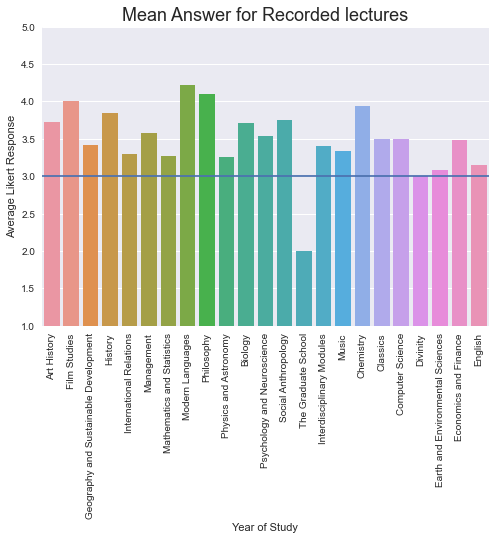

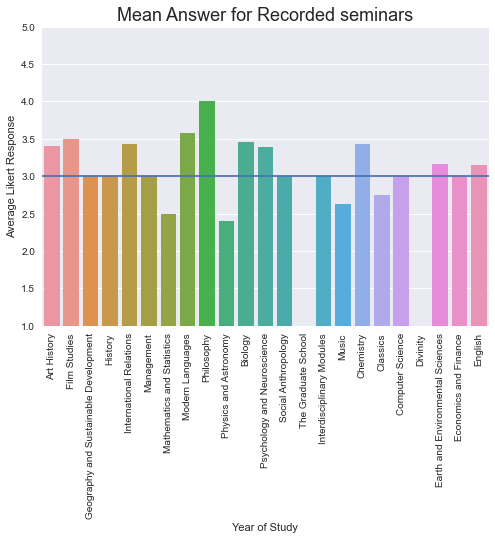

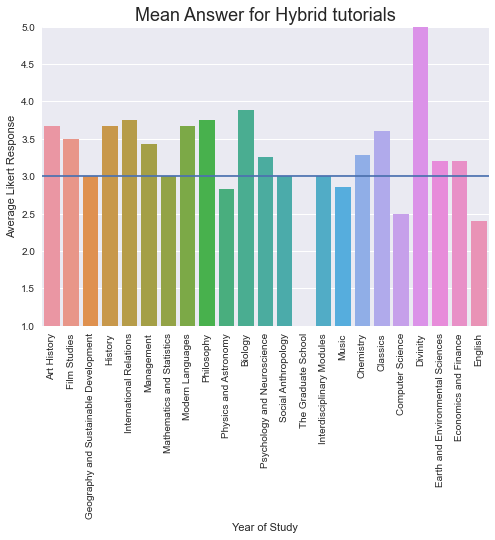

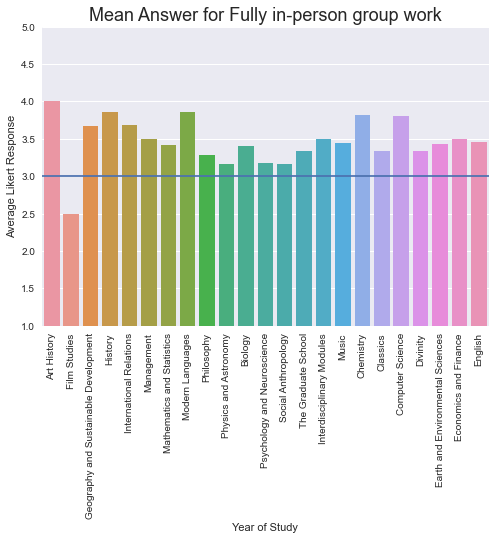

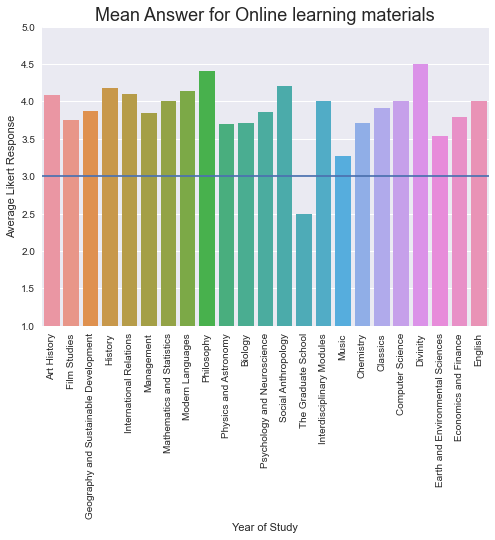

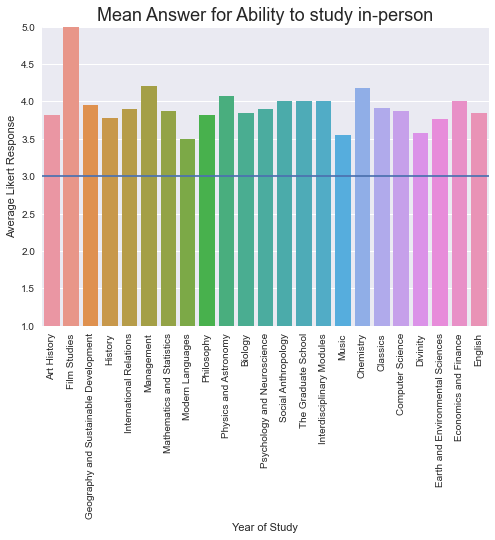

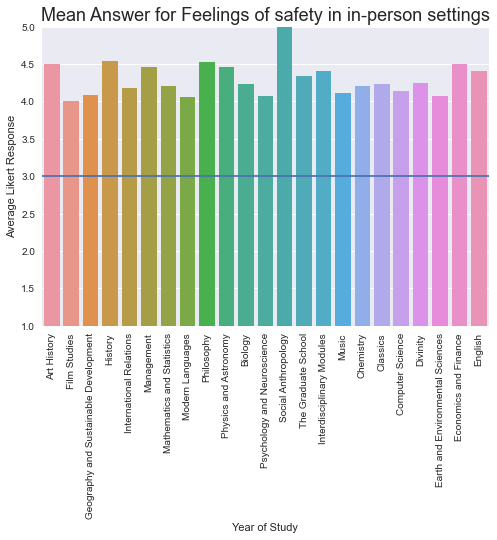

In [67]:
#School / academic
# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ10dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ10dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ10dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!   
ETdemonew = ET.copy()


ETdemoQ10 = ETdemonew['Q11'] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 

ETdemoQ10dic = {
    1:"Art History", 
    10:"Film Studies", 
    11:"Geography and Sustainable Development", 
    12:"History", 
    13:"International Relations",
    14:"Management",
    15:"Mathematics and Statistics",
    17:"Modern Languages",
    18:"Philosophy",
    19:"Physics and Astronomy",
    2:"Biology",
    20:"Psychology and Neuroscience",
    21:"Social Anthropology",
    22:"The Graduate School",
    23:"Interdisciplinary Modules",
    24:"Music",
    3:"Chemistry",
    4:"Classics",
    5:"Computer Science",
    6:"Divinity",
    7:"Earth and Environmental Sciences",
    8:"Economics and Finance",
    9:"English"
}


ETdemoQ10 = ETdemoQ10.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11'] = ETdemoQ10

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 

ETdemonew = ETdemonew[ETdemonew['Q11'].notnull()]

ETmultiindex = pd.MultiIndex.from_product([ETdemoQ10dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11','Q13_1', 'Q13_2', 'Q13_3', 'Q13_4', 'Q13_5', 'Q13_6', 'Q13_7', 'Q13_8', 'Q13_9', 'Q13_10', 'Q13_11', 
                        'Q13_12', 'Q13_13', 'Q13_14', 'Q13_15', 'Q13_16', 'Q13_17', 'Q13_18', 'Q13_19', 'Q13_20', 'Q13_21', 'Q13_22', 'Q13_23', 'Q13_24',
                        'Q13_25', 'Q13_26', 'Q13_27', 'Q13_28', 'Q13_29', 'Q13_30', 'Q13_31', 'Q13_32', 'Q13_33', 'Q13_34', 'Q13_35']]
valuecountsdict = {}

categories = ETdemoQ10dic.values()
for column in ETfiltered.columns:
    if column == 'Q11':
        continue
    
    means = []
    for category in  ETdemoQ10dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]

    ETtripledic = {
        "Q13_1":"Live online lectures", 
        "Q13_2":"Live online tutorials", 
        "Q13_3":"Live online seminars", 
        "Q13_4":"Live online labs/practicals", 
        "Q13_5":"Recorded lectures", 
        "Q13_6":"Recorded tutorials",
        "Q13_7":"Recorded seminars", 
        "Q13_8":"Recorded labs/practicals", 
        "Q13_9":"Fully in-person lectures", 
        "Q13_10":"Fully in-person tutorials", 
        "Q13_11":"Fully in-person seminars",
        "Q13_12":"Fully in-person labs/practicals",
        "Q13_13":"Hybrid lectures",
        "Q13_14":"Hybrid tutorials",
        "Q13_15":"Hybrid seminars",
        "Q13_16":"Hybrid labs/practicals", 
        "Q13_17":"Accessing library resources online",
        "Q13_18":"Accessing library resources in-person",
        "Q13_19":"Schedule flexibility",
        "Q13_20":"Online exams",
        "Q13_21":"In-person exams",
        "Q13_22":"Function of devices/wifi/platforms",
        "Q13_23":"Online group work",
        "Q13_24":"Fully in-person group work",
        "Q13_25":"Hybrid group work",
        "Q13_26":"Resources for academic support",
        "Q13_27":"Feelings of identity/belonging within school",
        "Q13_28":"Feelings of identity/belonging within university",
        "Q13_29":"Online learning materials",
        "Q13_30":"Online reading lists",
        "Q13_31":"Consistency between modules",
        "Q13_32":"Ability to study fully online",
        "Q13_33":"Ability to study in-person",
        "Q13_34":"Ability to study hybrid style",
        "Q13_35":"Feelings of safety in in-person settings",
    }
    
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [68]:
#School / wellbeing
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ10dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ10dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ10 = ETdemonew['Q11'] 
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETdemoQ10dic = {
    1:"Art History", 
    10:"Film Studies", 
    11:"Geography and Sustainable Development", 
    12:"History", 
    13:"International Relations",
    14:"Management",
    15:"Mathematics and Statistics",
    17:"Modern Languages",
    18:"Philosophy",
    19:"Physics and Astronomy",
    2:"Biology",
    20:"Psychology and Neuroscience",
    21:"Social Anthropology",
    22:"The Graduate School",
    23:"Interdisciplinary Modules",
    24:"Music",
    3:"Chemistry",
    4:"Classics",
    5:"Computer Science",
    6:"Divinity",
    7:"Earth and Environmental Sciences",
    8:"Economics and Finance",
    9:"English"
}

ETdemoQ10 = ETdemoQ10.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11'] = ETdemoQ10

ETdemonew = ETdemonew[ETdemonew['Q11'].notnull()]
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETmultiindex = pd.MultiIndex.from_product([ETdemoQ10dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11', 'Q18_1', 'Q18_2', 'Q18_3', 'Q18_4', 'Q18_5', 'Q18_6', 'Q18_7', 'Q18_8', 'Q18_9', 'Q18_10', 'Q18_11', 'Q18_12']]

valuecountsdict = {}

categories = ETdemoQ10dic.values()
for column in ETfiltered.columns:
    if column == 'Q11':
        continue
    
    means = []
    for category in  ETdemoQ10dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11'].str.contains(category)] 
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
        
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    ETtripledic = {
        "Q18_1":"Socio-political circumstances", 
        "Q18_2":"Financial Situation", 
        "Q18_3":"Accommodation Situation", 
        "Q18_4":"Home environment", 
        "Q18_5":"Exercise", 
        "Q18_6":"University resources for support",
        "Q18_7":"Study/work environment", 
        "Q18_8":"Community support", 
        "Q18_9":"Support from family and/or friends",
        "Q18_10":"Periods of social isolation",
        "Q18_11":"Feelings of safety in general",
        "Q18_12":"Feelings of safety from COVID-19"
        
        }
    
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("Year of Study")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)

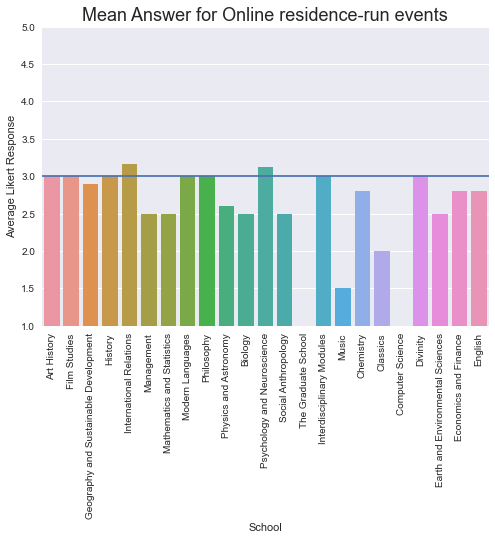

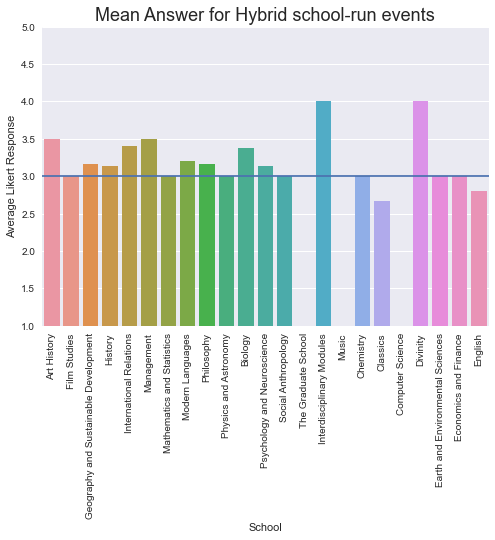

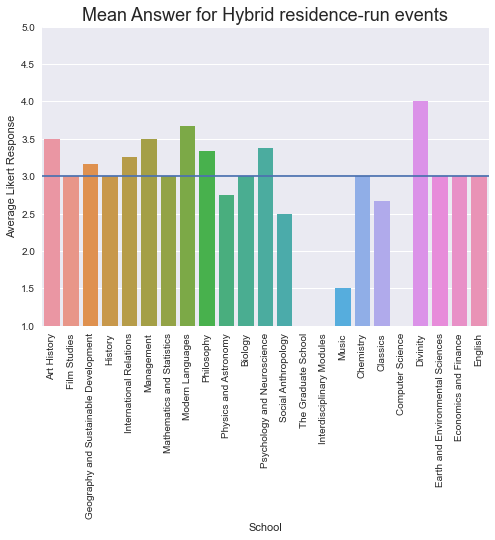

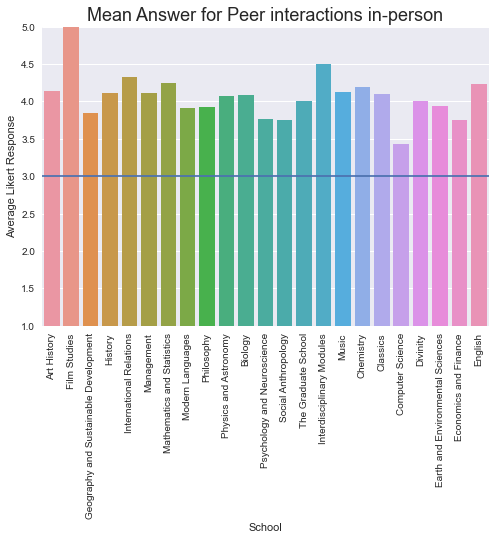

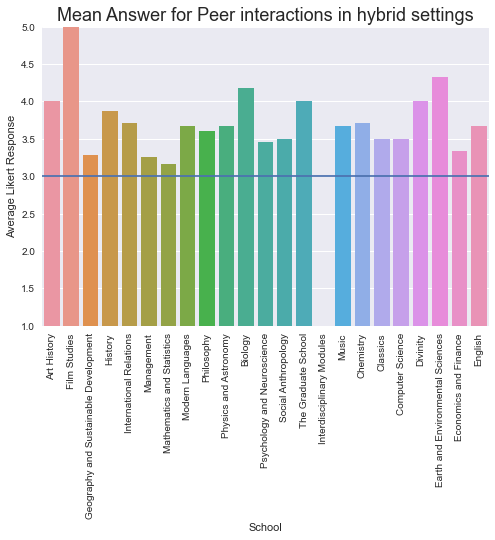

In [70]:
#school / social
# This function takes either a number or list of numbers, and returns the string representation(s) of the numbers as shown in the dictionary
# ETdemoQ10dic. While the list of numbers is a comma-seperated string, a single number is treated as a float
def getaccomtext(numbers):
    # If numbers represents a comma-separated string of numbers, the try block will execute. If numbers is a single number,
    # it will fail as .split() cannot be called on a float, and the except block will execute instead
    try:
        numlist = numbers.split(",")
        strlist = []
        for num in numlist:
            strlist.append(ETdemoQ10dic.get(int(num)))
        return ",".join(strlist)
    except:
        return ETdemoQ10dic.get(numbers)

#Because this code is copy/pasted, I removed the comments to make it more legible.  
#Please refer to the original cell for line-by-line explanations of the code!
ETdemonew = ET.copy()
ETdemoQ10 = ETdemonew['Q11'] 
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETdemoQ10dic = {
    1:"Art History", 
    10:"Film Studies", 
    11:"Geography and Sustainable Development", 
    12:"History", 
    13:"International Relations",
    14:"Management",
    15:"Mathematics and Statistics",
    17:"Modern Languages",
    18:"Philosophy",
    19:"Physics and Astronomy",
    2:"Biology",
    20:"Psychology and Neuroscience",
    21:"Social Anthropology",
    22:"The Graduate School",
    23:"Interdisciplinary Modules",
    24:"Music",
    3:"Chemistry",
    4:"Classics",
    5:"Computer Science",
    6:"Divinity",
    7:"Earth and Environmental Sciences",
    8:"Economics and Finance",
    9:"English"
}

ETdemoQ10 = ETdemoQ10.map(getaccomtext)

ETdemonew = ET.copy()
ETdemonew['Q11'] = ETdemoQ10

ETdemonew = ETdemonew[ETdemonew['Q11'].notnull()]
ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 16] 

ETdemoQ10  = ETdemoQ10[ETdemoQ10  != 25] 
ETmultiindex = pd.MultiIndex.from_product([ETdemoQ10dic.values(), [1, 2, 3, 4, 5]], names=["Category", "Likert Answer"])

ETfiltered = ETdemonew[['Q11', 'Q33_1', 'Q33_2', 'Q33_3', 'Q33_4', 'Q33_5', 'Q33_6', 'Q33_7', 'Q33_8', 'Q33_9', 'Q33_10', 'Q33_11', 'Q33_12', 'Q33_13',
                       'Q33_14', 'Q33_15', 'Q33_16', 'Q33_17', 'Q33_18']]

valuecountsdict = {}

categories = ETdemoQ10dic.values()
for column in ETfiltered.columns:
    if column == 'Q11':
        continue
    
    means = []
    for category in  ETdemoQ10dic.values():
        ETdoublefiltered = ETfiltered[ETfiltered['Q11'].str.contains(category)]
        ETtriplefiltered = ETdoublefiltered[column]
        means.append(ETtriplefiltered.mean())
       
    ETtripleplot = pd.DataFrame({"Category":categories, "Mean":means})
    ETtripleplotZ = ETtripleplot[((ETtripleplot['Mean']-ETtripleplot['Mean'].mean()).abs() > 3*ETtripleplot['Mean'].std())]
    
    ETtripledic = {
        "Q33_1":"Online society events", 
        "Q33_2":"Online union-run events", 
        "Q33_3":"Online school-run events", 
        "Q33_4":"Online residence-run events", 
        "Q33_5":"Hybrid society events", 
        "Q33_6":"Hybrid union events",
        "Q33_7":"Hybrid school-run events", 
        "Q33_8":"Hybrid residence-run events",
        "Q33_9":"In-person society events",
        "Q33_10":"In-person union-run events",
        "Q33_11":"In-person school-run events",
        "Q33_12":"In-person residence-run events",
        "Q33_13":"Online groups/chats",
        "Q33_14":"Online society groups",
        "Q33_15":"Peer interactions online",
        "Q33_16":"Peer interactions in-person",
        "Q33_17":"Peer interactions in hybrid settings",
        "Q33_18":"Online attendance during isolation",
    }
    if not ETtripleplotZ.empty:
        plt.figure()
        sns.barplot(data=ETtripleplot, x="Category", y="Mean")
        plt.xlabel("School")
        plt.ylabel("Average Likert Response")
        plt.ylim(1,5)
        plt.title("Mean Answer for " + ETtripledic[column], fontsize=18)
        plt.xticks(rotation=90)
        plt.axhline(3)

In [71]:
#Selecting only the relevant columns
ETfin0 = ET.loc[:,['Q61_1', 'Q61_2','Q61_3', 'Q61_4']]

#Question 3 asks if students struggled financially during the semester.  
#Questions 61_(1-3) are tick box questions, asking the following info:
#61_1: I did not receive any financial help
#61_2: I did not seek
#61_3: I received financial help from uni
#4: recieved from external source
ETfinance = ETfin0

In [72]:
ETfinance = ETfinance.fillna(0)
print(ETfinance)

     Q61_1  Q61_2  Q61_3  Q61_4
0      0.0    0.0    0.0    0.0
1      0.0    0.0    0.0    0.0
2      0.0    0.0    0.0    0.0
3      0.0    0.0    0.0    0.0
4      0.0    0.0    0.0    0.0
..     ...    ...    ...    ...
317    0.0    1.0    0.0    0.0
318    0.0    0.0    0.0    0.0
319    0.0    0.0    0.0    0.0
320    1.0    1.0    0.0    0.0
321    0.0    0.0    0.0    0.0

[322 rows x 4 columns]


In [73]:
#first lets find the percentage of studnets that did financially struggle
ETfinper = (ETfinance['Q61_3'].sum() + ETfinance['Q61_4'].sum())/ETfinance['Q61_3'].count() * 100
#print(ETfinper)
print("Percentage of Students who Recieved financial help " + onedec(ETfinper) + "%")

Percentage of Students who Recieved financial help 16.8%


In [74]:
ETfinper = (ETfinance['Q61_1'].sum())/ETfinance['Q61_3'].count() * 100
#print(ETfinper)
print("Percentage of Students who sought but did not recieve financial help: " + onedec(ETfinper) + "%")

Percentage of Students who sought but did not recieve financial help: 28.9%


In [75]:
ETfinper1 = (ETfinance['Q61_1'].sum())/ETfinance['Q61_3'].count() * 100
ETfinper2 = (ETfinance['Q61_2'].sum())/ETfinance['Q61_3'].count() * 100
ETfinper3 = (ETfinance['Q61_3'].sum())/ETfinance['Q61_3'].count() * 100
ETfinper4 = (ETfinance['Q61_4'].sum())/ETfinance['Q61_3'].count() * 100

In [76]:
ETfinperfinal = pd.DataFrame([ETfinper1, ETfinper2, ETfinper3, ETfinper4])

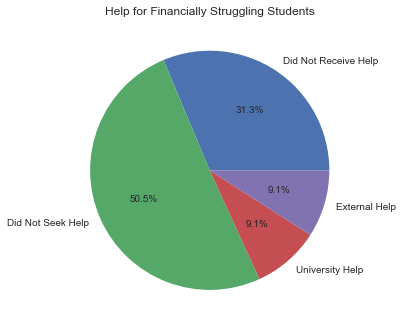

In [77]:
labels = ['Did Not Receive Help','Did Not Seek Help', 'University Help', 'External Help']
plt.figure()
#The autopct code gets the values of the pie pieces to show on the chart
plt.pie(ETfinperfinal[0], labels=labels, autopct="%1.1f%%")
plt.title("Help for Financially Struggling Students")
plt.show()